In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import joblib
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

# datasets 
df = pd.read_csv('wine-quality.csv')

## EDA

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
for col in df.columns:
    print(col ,"-",df[col].nunique())

fixed acidity - 68
volatile acidity - 125
citric acid - 87
residual sugar - 310
chlorides - 160
free sulfur dioxide - 132
total sulfur dioxide - 251
density - 890
pH - 103
sulphates - 79
alcohol - 103
quality - 7


In [6]:
def count_coutliers(df):
    results = []
    for col in df.columns:
        q1 = df[col].quantile(q =0.25)
        q3 = df[col].quantile(q =0.75)
        iqr = q1 + q3
        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)
        
        count = 0
        for i in df[col]:
            if i >= upper_limit or i <= lower_limit:
                count = count + 1
            precentage_count = round((count/len(df[col])*100),2)
        
        results.append({'col_name': col, 
                       'no_of_outliers': count,
                       'percentage_count':precentage_count})
        
    results = pd.DataFrame(results)
    return results

count_coutliers(df)

,col_name,no_of_outliers,percentage_count
0,fixed acidity,0,0.00
1,volatile acidity,0,0.00
2,citric acid,1,0.02
3,residual sugar,3,0.06
4,chlorides,28,0.57
5,free sulfur dioxide,1,0.02
6,total sulfur dioxide,0,0.00
7,density,0,0.00
8,pH,0,0.00
9,sulphates,0,0.00


quality
6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: proportion, dtype: float64


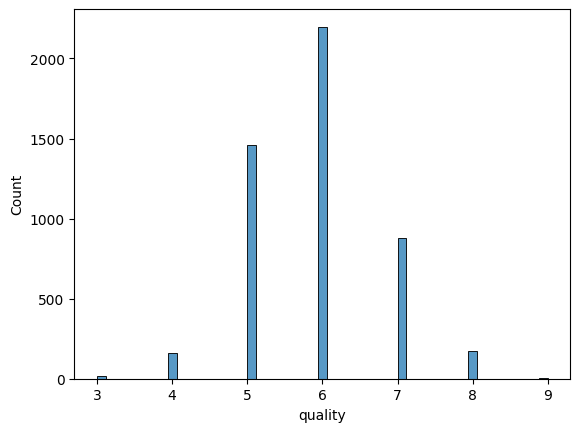

In [7]:
sns.histplot(df['quality']);
print(df['quality'].value_counts(normalize = True))

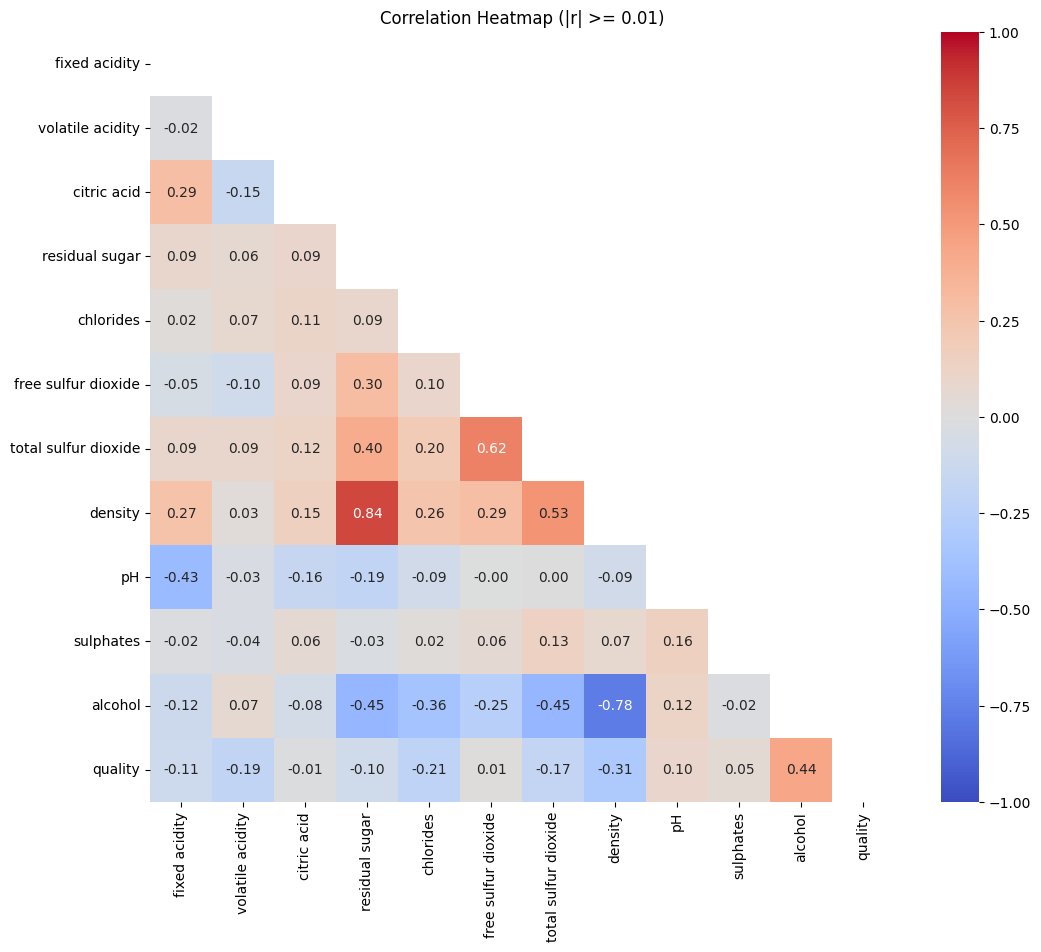

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize= (12,10))
sns.heatmap(corr,
            annot= True,
            mask = mask,
            cmap = "coolwarm",
            vmin = -1,
            vmax=1,
            center = 0,
            fmt= ".2f")

plt.title("Correlation Heatmap (|r| >= 0.01)")
plt.show()

In [9]:
# corr = df.corr()
# mask = np.abs(corr) < 0.5
# upper_traingle_mask = np.triu(np.ones_like(corr, dtype=bool))
# mask = np.logical_or(mask, upper_traingle_mask)
# plt.figure(figsize= (12,10))
# sns.heatmap(corr,
#             annot= True,
#             mask = mask,
#             cmap = "coolwarm",
#             vmin = -1,
#             vmax=1,
#             center = 0,
#             fmt= ".2f")

# plt.title("Correlation Heatmap (|r| >= 0.01)")
# plt.show()

In [10]:
print(f"na values- \n{df.isna().sum()}\n\n",
      f"duplicated values - {df.duplicated().sum()}\n\n",
      f"shape of dataset: {df.shape}")

na values- 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 duplicated values - 937

 shape of dataset: (4898, 12)


In [11]:
df.drop_duplicates(inplace= True)
df.shape

(3961, 12)

In [12]:
X = df.drop(columns= 'quality').copy()
y = df['quality'].copy()

print(X.shape,y.shape)

(3961, 11) (3961,)


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2 , random_state= 42)
print(X_train.shape,X_test.shape)

(3168, 11) (793, 11)


## data_cleaning

In [14]:
def remove_outliers(df):
    df_clean = df.copy()
    for col in df.columns:
        q1 = df[col].quantile(q =0.25)
        q3 = df[col].quantile(q =0.75)
        iqr = q1 + q3
        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)
        
        df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]
    
    return df_clean


remove_outliers(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
df_clean = (
    df
    .pipe(remove_outliers)
    .assign(quality = lambda x: x['quality'].apply(lambda val: 1 if val > 7 
                                                   else 2 if 5 <= val <= 7 
                                                   else 3))
)
display(df_clean)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


### Preprocessing

In [16]:
X = df_clean.drop(['quality'], axis = 1).copy()
y = df_clean['quality'].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=41)
print(X_train.shape,X_test.shape)

(2751, 11) (1179, 11)


#### Preporcessing Pipeline

In [17]:
preprocessing_pipeline = Pipeline(steps = [
                                    ('minmax', preprocessing.MinMaxScaler()),
                                    ('standardscaler',preprocessing.StandardScaler())
                                   ])


### Model Pipeline

In [22]:
from sklearn.ensemble import RandomForestRegressor
model_pipeline = Pipeline([
                         ('scaling', 'passthrough'), # Placeholder for the scaler
                        #  ('preprocessor',preprocessing_pipeline),
                         ('model', RandomForestRegressor(criterion= 'absolute_error'))
                        ])

#### GridSearch CV pipeline

In [25]:

# Define the parameter grid
param_grid = [{
    # 'scaler': [preprocessing.MinMaxScaler(), preprocessing.StandardScaler()],
    'model__n_estimators': [300, 500],
    'model__max_depth': [10, 15, 21],
    'model__min_samples_split': [5,11]
}]

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=41)

grid_search = model_selection.GridSearchCV(estimator= model_pipeline,
                             param_grid= param_grid,
                             cv = kfold,
                             n_jobs= -1,
                             verbose=0)
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.09399516484124837

In [21]:
grid_search.best_params_

{'model__max_depth': 20, 'model__n_estimators': 500}